In [1]:
import csv
import numpy as np
import pandas as pd
import os
from subprocess import check_output
import matplotlib.pyplot as plt 
import scipy.stats as st
import seaborn as sns

csv_file = "City_of_Seattle_Wages_by_Department.csv"

sea_wage_df = pd.read_csv(csv_file)
sea_wage_df.head()

,Department,Jobtitle,Female Avg Hrly Rate,No. Female Empl,Male Avg Hrly Rate,No. Male Empl,Total Avg Hrly Rate,Total No. Empl,Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Ratio of womens hourly rate to mens hourly rate - percentage,Notes
0,Arts and Cultural Affairs,Accountant,NaN,NaN,29.75,1.0,29.75,1,39.0,NaN,No women in title
1,Arts and Cultural Affairs,Actg Tech III,26.79,1.0,NaN,NaN,26.79,1,56.0,NaN,No men in title
2,Arts and Cultural Affairs,Admin Spec III,26.26,1.0,NaN,NaN,26.26,1,37.0,NaN,No men in title
3,Arts and Cultural Affairs,Admin Staff Asst,31.76,2.0,NaN,NaN,31.76,2,99.0,NaN,No men in title
4,Arts and Cultural Affairs,Arts Conserv Tech,27.78,1.0,27.78,1.0,27.78,2,65.0,100.0,NaN


In [2]:
employees_male = sea_wage_df.groupby("Department").agg({"No. Male Empl":"sum"})
employees_male

,No. Male Empl
Department,
Arts and Cultural Affairs,8.0
City Auditor,2.0
City Budget Office,10.0
City Employees Retirement Syst,4.0
City Light,1169.0
Civil Service Commissions,5.0
Department of Planning & Dev,177.0
Dept of Finance & Admn Svc,272.0
Ethics And Elections,4.0


In [3]:
hourly_wage_male = sea_wage_df.groupby("Department").agg({"Male Avg Hrly Rate":"mean"})
hourly_wage_male

,Male Avg Hrly Rate
Department,
Arts and Cultural Affairs,31.623750
City Auditor,56.390000
City Budget Office,55.170000
City Employees Retirement Syst,35.080000
City Light,40.674619
Civil Service Commissions,5.530000
Department of Planning & Dev,42.604655
Dept of Finance & Admn Svc,37.185647
Ethics And Elections,47.122500


In [4]:
number_employees_female = sea_wage_df.groupby("Department").agg({"No. Female Empl":"sum"})
number_employees_female

,No. Female Empl
Department,
Arts and Cultural Affairs,20.0
City Auditor,8.0
City Budget Office,17.0
City Employees Retirement Syst,12.0
City Light,520.0
Civil Service Commissions,3.0
Department of Planning & Dev,149.0
Dept of Finance & Admn Svc,229.0
Ethics And Elections,3.0


In [5]:
hourly_wage_female = sea_wage_df.groupby("Department").agg({"Female Avg Hrly Rate":"mean"})
hourly_wage_female

,Female Avg Hrly Rate
Department,
Arts and Cultural Affairs,36.366923
City Auditor,41.475000
City Budget Office,44.316667
City Employees Retirement Syst,37.761250
City Light,38.136923
Civil Service Commissions,29.646667
Department of Planning & Dev,40.298947
Dept of Finance & Admn Svc,36.281250
Ethics And Elections,44.870000


In [6]:
city_light_data = sea_wage_df.loc[sea_wage_df["Department"] == "City Light"]
city_light_data

,Department,Jobtitle,Female Avg Hrly Rate,No. Female Empl,Male Avg Hrly Rate,No. Male Empl,Total Avg Hrly Rate,Total No. Empl,Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Ratio of womens hourly rate to mens hourly rate - percentage,Notes
39,City Light,Accountant,30.63,4.0,30.92,3.0,30.75,7,83.29,99.05,NaN
40,City Light,"Accountant,Prin",38.48,2.0,39.96,1.0,38.97,3,16.67,96.28,NaN
41,City Light,"Accountant,Sr",35.26,4.0,33.67,2.0,34.73,6,55.83,104.73,NaN
42,City Light,Act Exec,NaN,NaN,43.10,1.0,43.10,1,38.00,NaN,No women in title
43,City Light,Actg Tech I-BU,22.56,1.0,22.56,1.0,22.56,2,59.50,100.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
298,City Light,Util Hearing Ofcr,42.25,1.0,NaN,NaN,42.25,1,80.00,NaN,No men in title
299,City Light,Util Laborer,NaN,NaN,22.56,1.0,22.56,1,244.00,NaN,No women in title
300,City Light,"Warehouser,Chief",30.88,1.0,30.88,4.0,30.88,5,185.20,100.00,NaN
301,City Light,"Warehouser,Sr-BU",26.50,4.0,26.50,9.0,26.50,13,131.08,100.00,NaN


In [7]:
avg_city_light = city_light_data.mean()
avg_city_light

Female Avg Hrly Rate                                             38.136923
No. Female Empl                                                   3.076923
Male Avg Hrly Rate                                               40.674619
No. Male Empl                                                     5.566667
Total Avg Hrly Rate                                              39.214015
Total No. Empl                                                    6.397727
Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION      79.104659
Ratio of womens hourly rate to mens hourly rate - percentage    100.216404
dtype: float64

In [8]:
cl_female_avg = city_light_data.agg({"Female Avg Hrly Rate":"mean"})
cl_female_avg

Female Avg Hrly Rate    38.136923
dtype: float64

In [9]:
cl_male_avg = city_light_data.agg({"Male Avg Hrly Rate":"mean"})
cl_male_avg

Male Avg Hrly Rate    40.674619
dtype: float64

C:\Users\18087\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1306: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()
C:\Users\18087\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\18087\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


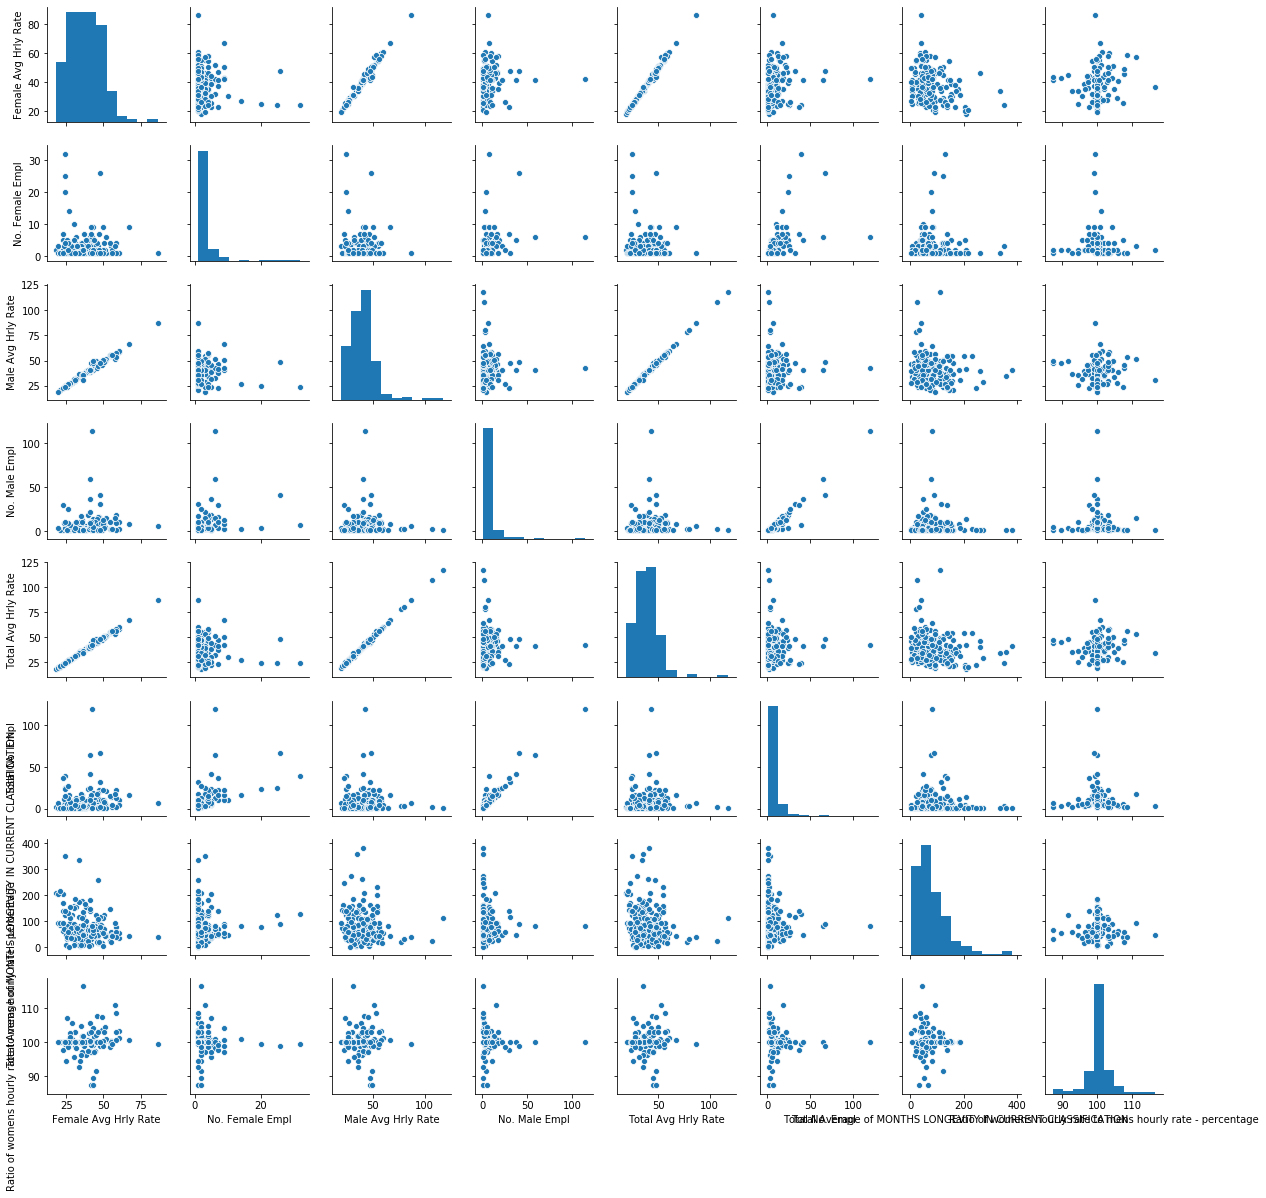

In [10]:
sns.pairplot(city_light_data)
plt.savefig('Too muich charting')


The average salary of men that work in the City Lights department is [40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903,

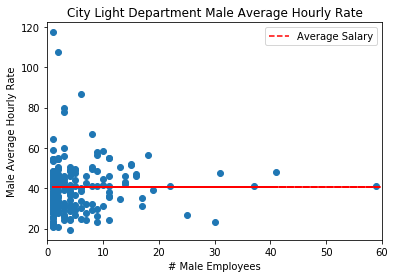

In [11]:
 y_mean = [np.mean(cl_male_avg)]*len(city_light_data)

fig,ax = plt.subplots()

# Plot the data
plt.scatter(city_light_data['No. Male Empl'],city_light_data['Male Avg Hrly Rate'])
ax.set_xlim(0,60)

# Plot the average line
mean_line = ax.plot(city_light_data['No. Male Empl'],y_mean, label='Average Salary', linestyle='--', color='red')
print(f"The average salary of men that work in the City Lights department is {y_mean}")
plt.xlabel('# Male Employees')
plt.ylabel('Male Average Hourly Rate')
plt.title('City Light Department Male Average Hourly Rate')
legend = ax.legend(loc='upper right')
plt.savefig('City Light Department Male Average Hourly Rate')
plt.show()

The average salary of woman that work in the City Lights department is [38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.136923076923075, 38.13692

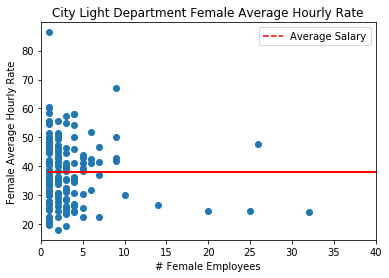

In [12]:
 y_mean = [np.mean(cl_female_avg)]*len(city_light_data)

fig,ax = plt.subplots()

# Plot the data
plt.scatter(city_light_data['No. Female Empl'],city_light_data['Female Avg Hrly Rate'])
ax.set_xlim(0,40)

# Plot the average line
mean_line = ax.plot(city_light_data['No. Male Empl'],y_mean, label='Average Salary', linestyle='--', color='red')
print(f"The average salary of woman that work in the City Lights department is {y_mean}")
plt.xlabel('# Female Employees')
plt.ylabel('Female Average Hourly Rate')
plt.title('City Light Department Female Average Hourly Rate')
legend = ax.legend(loc='upper right')
plt.savefig('City Light Department Female Average Hourly Rate')
plt.show()

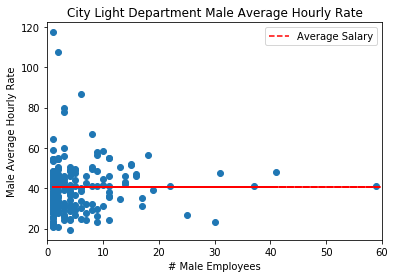

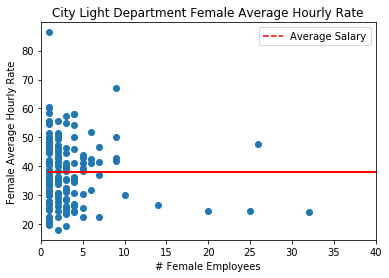

In [13]:
 y_mean = [np.mean(cl_male_avg)]*len(city_light_data)

fig,ax = plt.subplots()

# Plot the data
plt.scatter(city_light_data['No. Male Empl'],city_light_data['Male Avg Hrly Rate'])
ax.set_xlim(0,60)

# Plot the average line
mean_line = ax.plot(city_light_data['No. Male Empl'],y_mean, label='Average Salary', linestyle='--', color='red')
plt.xlabel('# Male Employees')
plt.ylabel('Male Average Hourly Rate')
plt.title('City Light Department Male Average Hourly Rate')
legend = ax.legend(loc='upper right')

 y_mean = [np.mean(cl_female_avg)]*len(city_light_data)

fig,ax = plt.subplots()

# Plot the data
plt.scatter(city_light_data['No. Female Empl'],city_light_data['Female Avg Hrly Rate'])
ax.set_xlim(0,40)

# Plot the average line
mean_line = ax.plot(city_light_data['No. Male Empl'],y_mean, label='Average Salary', linestyle='--', color='red')
plt.xlabel('# Female Employees')
plt.ylabel('Female Average Hourly Rate')
plt.title('City Light Department Female Average Hourly Rate')
legend = ax.legend(loc='upper right')
plt.savefig('City Light Department Female vs Male Average Hourly Rate')
plt.show()

In [14]:
percent_fvm = sea_wage_df.loc[sea_wage_df["Department"] == "City Light"]
percent_fvm

,Department,Jobtitle,Female Avg Hrly Rate,No. Female Empl,Male Avg Hrly Rate,No. Male Empl,Total Avg Hrly Rate,Total No. Empl,Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Ratio of womens hourly rate to mens hourly rate - percentage,Notes
39,City Light,Accountant,30.63,4.0,30.92,3.0,30.75,7,83.29,99.05,NaN
40,City Light,"Accountant,Prin",38.48,2.0,39.96,1.0,38.97,3,16.67,96.28,NaN
41,City Light,"Accountant,Sr",35.26,4.0,33.67,2.0,34.73,6,55.83,104.73,NaN
42,City Light,Act Exec,NaN,NaN,43.10,1.0,43.10,1,38.00,NaN,No women in title
43,City Light,Actg Tech I-BU,22.56,1.0,22.56,1.0,22.56,2,59.50,100.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
298,City Light,Util Hearing Ofcr,42.25,1.0,NaN,NaN,42.25,1,80.00,NaN,No men in title
299,City Light,Util Laborer,NaN,NaN,22.56,1.0,22.56,1,244.00,NaN,No women in title
300,City Light,"Warehouser,Chief",30.88,1.0,30.88,4.0,30.88,5,185.20,100.00,NaN
301,City Light,"Warehouser,Sr-BU",26.50,4.0,26.50,9.0,26.50,13,131.08,100.00,NaN


In [54]:
percent_fvm_1 = sea_wage_df.groupby("Department").agg({"Ratio of womens hourly rate to mens hourly rate - percentage":"mean"})
fig.savefig('Ratio of womens hourly rate to mens hourly rate - percentage')
percent_fvm_1

,Ratio of womens hourly rate to mens hourly rate - percentage
Department,
Arts and Cultural Affairs,99.490000
City Auditor,110.270000
City Budget Office,100.740000
City Employees Retirement Syst,99.395000
City Light,100.216404
Civil Service Commissions,100.000000
Department of Planning & Dev,100.266552
Dept of Finance & Admn Svc,99.785909
Ethics And Elections,92.760000


In [32]:
percent_fvm_avg = percent_fvm_1.mean()
percent_fvm_avg

Ratio of womens hourly rate to mens hourly rate - percentage    99.761199
dtype: float64

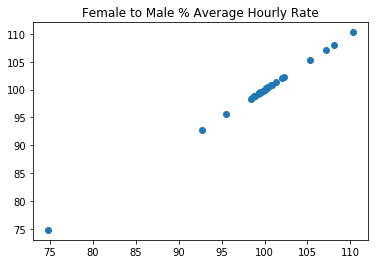

In [34]:
# Plot the data
plt.scatter(percent_fvm_1,percent_fvm_1)
ax.set_xlim(90,115)
ax.set_ylim(90,115)

plt.title('Female to Male % Average Hourly Rate')
plt.savefig('Female to Male % Average Hourly Rate')
plt.show()

In [41]:
# plot points inside distribution's width
ax.scatter([percent_fvm_1<94], [percent_fvm_1<94], marker="s", color="#2e91be")
# plot points outside distribution's width
ax.scatter([percent_fvm_1>=105], [percent_fvm_1>=105], marker="d", color="#d46f9f")

ax.plt.scatter(percent_fvm_1,percent_fvm_1)
ax.set_xlim(90,115)
ax.set_ylim(90,115)

plt.title('Female to Male % Average Hourly Rate')
plt.savefig('Female to Male % Average Hourly Rate')
plt.show()

ValueError: cannot copy sequence with size 31 to array axis with dimension 1

In [ ]:
total_employee = sea_wage_df.groupby("Department").agg({"Total No. Empl":"sum"})
total_employee

In [ ]:
avg_city_light1 = percent_fvm_1.mean()
avg_city_light1

In [ ]:
 y_mean = [np.mean(avg_city_light1)]*len(city_light_data)

fig,ax = plt.subplots()

# Plot the data
plt.scatter(city_light_data['No. Male Empl'],city_light_data['Male Avg Hrly Rate'])
ax.set_xlim(0,60)

# Plot the average line
mean_line = ax.plot(city_light_data['No. Male Empl'],y_mean, label='Average Salary', linestyle='--', color='red')
print(f"The average salary of men that work in the City Lights department is {y_mean}")
plt.xlabel('# Male Employees')
plt.ylabel('Male Average Hourly Rate')
plt.title('City Light Department Male Average Hourly Rate')
legend = ax.legend(loc='upper right')
plt.show()

The average salary of men that work in the City Lights department is [40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903, 40.67461904761903,

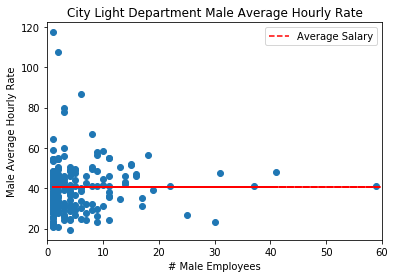

In [42]:
 y_mean = [np.mean(cl_male_avg)]*len(city_light_data)

fig,ax = plt.subplots()

# Plot the data
plt.scatter(city_light_data['No. Male Empl'],city_light_data['Male Avg Hrly Rate'])
ax.set_xlim(0,60)

# Plot the average line
mean_line = ax.plot(city_light_data['No. Male Empl'],y_mean, label='Average Salary', linestyle='--', color='red')
print(f"The average salary of men that work in the City Lights department is {y_mean}")
plt.xlabel('# Male Employees')
plt.ylabel('Male Average Hourly Rate')
plt.title('City Light Department Male Average Hourly Rate')
legend = ax.legend(loc='upper right')
plt.show()

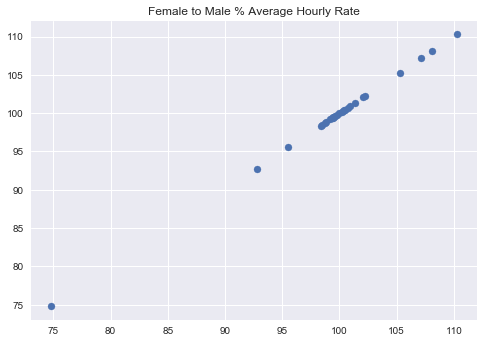

In [72]:




plt.style.use('seaborn')


plt.scatter(percent_fvm_1,percent_fvm_1)
ax.set_xlim(90,115)
ax.set_ylim(90,115)

plt.title('Female to Male % Average Hourly Rate')
plt.savefig('Female to Male % Average Hourly Rate')
plt.show()

In [73]:
total_employee = sea_wage_df.groupby("Department").agg({"Total No. Empl":"sum"})
total_employee

,Total No. Empl
Department,
Arts and Cultural Affairs,28
City Auditor,10
City Budget Office,27
City Employees Retirement Syst,16
City Light,1689
Civil Service Commissions,8
Department of Planning & Dev,326
Dept of Finance & Admn Svc,501
Ethics And Elections,7


In [ ]:
 y_mean = [np.mean(cl_female_avg)]*len(city_light_data)

fig,ax = plt.subplots()

# Plot the data
plt.scatter(city_light_data['No. Female Empl'],city_light_data['Female Avg Hrly Rate'])
ax.set_xlim(0,40)

# Plot the average line
mean_line = ax.plot(city_light_data['No. Male Empl'],y_mean, label='Average Salary', linestyle='--', color='red')
print(f"The average salary of woman that work in the City Lights department is {y_mean}")
plt.xlabel('# Female Employees')
plt.ylabel('Female Average Hourly Rate')
plt.title('City Light Department Female Average Hourly Rate')
legend = ax.legend(loc='upper right')
plt.savefig('City Light Department Female Average Hourly Rate')
plt.show()

In [85]:
df1 ["d"] = 


employee_percentage = sea_wage_df([employees_male]/sea_wage_df[number_employees_female], index=
sea_wage_df["No. Female Empl"].fillna(0, inplace = True)
sea_wage_df["No. Male Empl"].fillna(0, inplace = True)

employee_percentage

ValueError: Must pass DataFrame with boolean values only

In [81]:
s = 200
x = number_employees_female(["No. Female Empl"], color='green')
y = employees_male(["No. Male Empl"], color='red')

plt.title("Female vs Male percentage Ratio")
plt.xlabel("No. Female Empl")
plt.ylabel("No. Male Empl")
plt.scatter(x, y, s)

TypeError: 'DataFrame' object is not callable

In [ ]:
 y_mean = [np.mean(cl_female_avg)]*len(city_light_data)

fig,ax = plt.subplots()

# Plot the data
plt.scatter(city_light_data['No. Female Empl'],city_light_data['Female Avg Hrly Rate'])
ax.set_xlim(0,40)

# Plot the average line
mean_line = ax.plot(city_light_data['No. Male Empl'],y_mean, label='Average Salary', linestyle='--', color='red')
print(f"The average salary of woman that work in the City Lights department is {y_mean}")
plt.xlabel('# Female Employees')
plt.ylabel('Female Average Hourly Rate')
plt.title('City Light Department Female Average Hourly Rate')
legend = ax.legend(loc='upper right')
plt.savefig('City Light Department Female Average Hourly Rate')
plt.show()

In [90]:
 y_mean = [np.mean(cl_female_avg)]*len(city_light_data)

fig,ax = plt.subplots()

# Plot the data
plt.scatter(city_light_data['No. Female Empl'],city_light_data['Female Avg Hrly Rate'])
ax.set_xlim(0,40)

# Plot the average line
mean_line = ax.plot(city_light_data['No. Male Empl'],y_mean, label='Average Salary', linestyle='--', color='red')
print(f"The average salary of woman that work in the City Lights department is {y_mean}")
plt.xlabel('# Female Employees')
plt.ylabel('Female Average Hourly Rate')
plt.title('City Light Department Female Average Hourly Rate')
legend = ax.legend(loc='upper right')
plt.savefig('City Light Department Female Average Hourly Rate')
plt.show()


Male Avg Hrly Rate    40.674619
dtype: float64

In [91]:
firedep_data = sea_wage_df.loc[sea_wage_df["Department"] == "Fire Department"]
firedep_data

,Department,Jobtitle,Female Avg Hrly Rate,No. Female Empl,Male Avg Hrly Rate,No. Male Empl,Total Avg Hrly Rate,Total No. Empl,Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Ratio of womens hourly rate to mens hourly rate - percentage,Notes
525,Fire Department,"Accountant,Prin",39.96,1.0,NaN,NaN,39.96,1,70.00,NaN,No men in title
526,Fire Department,Actg Tech I-BU,22.56,2.0,NaN,NaN,22.56,2,114.00,NaN,No men in title
527,Fire Department,Actg Tech II-BU,24.35,4.0,NaN,NaN,24.35,4,112.25,NaN,No men in title
528,Fire Department,Actg Tech III-BU,26.79,1.0,NaN,NaN,26.79,1,39.00,NaN,No men in title
529,Fire Department,Admin Spec I-BU,22.56,7.0,NaN,NaN,22.56,7,95.00,NaN,No men in title
...,...,...,...,...,...,...,...,...,...,...,...
604,Fire Department,"StratAdvsr2,General Govt",38.60,1.0,51.37,1.0,44.99,2,49.00,75.15,NaN
605,Fire Department,"StratAdvsr3,General Govt",NaN,NaN,52.95,1.0,52.95,1,27.00,NaN,No women in title
606,Fire Department,"Trng&Ed Coord,Asst",26.79,1.0,NaN,NaN,26.79,1,45.00,NaN,No men in title
607,Fire Department,"Trng&Ed Coord,Asst-BU",26.79,1.0,NaN,NaN,26.79,1,119.00,NaN,No men in title


In [92]:
avg_firedep = firedep_data.mean()
avg_firedep

Female Avg Hrly Rate                                            39.821053
No. Female Empl                                                  3.552632
Male Avg Hrly Rate                                              46.825846
No. Male Empl                                                   14.400000
Total Avg Hrly Rate                                             44.661667
Total No. Empl                                                  12.750000
Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION     54.150476
Ratio of womens hourly rate to mens hourly rate - percentage    99.457778
dtype: float64

In [93]:
fd_female_avg = firedep_data.agg({"Female Avg Hrly Rate":"mean"})
fd_female_avg

Female Avg Hrly Rate    39.821053
dtype: float64

In [94]:
fd_male_avg = firedep_data.agg({"Male Avg Hrly Rate":"mean"})
fd_male_avg

Male Avg Hrly Rate    46.825846
dtype: float64

The average salary of men that work in the Fire Department is [46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.82584615384613

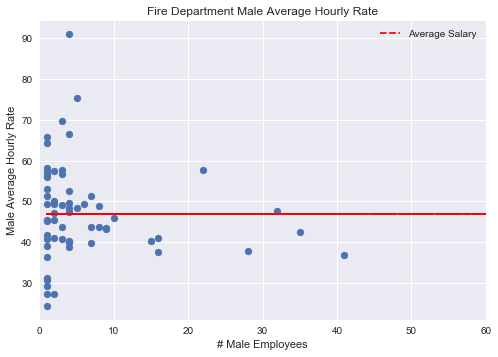

In [96]:
 y_mean = [np.mean(fd_male_avg)]*len(firedep_data)

fig,ax = plt.subplots()

# Plot the data
plt.scatter(firedep_data['No. Male Empl'],firedep_data['Male Avg Hrly Rate'])
ax.set_xlim(0,60)

# Plot the average line
mean_line = ax.plot(firedep_data['No. Male Empl'],y_mean, label='Average Salary', linestyle='--', color='red')
print(f"The average salary of men that work in the Fire Department is {y_mean}")
plt.xlabel('# Male Employees')
plt.ylabel('Male Average Hourly Rate')
plt.title('Fire Department Male Average Hourly Rate')
legend = ax.legend(loc='upper right')
plt.savefig('Fire Department Male Average Hourly Rate')
plt.show()

The average salary of woman that work in the Fire Department is [39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.8

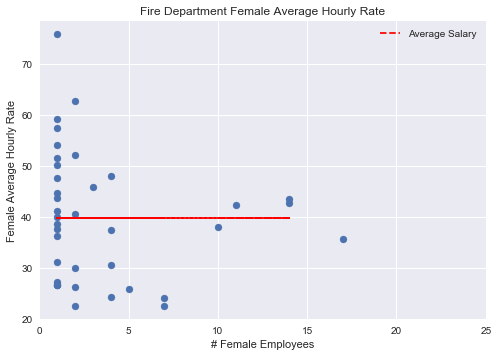

In [98]:
 y_mean = [np.mean(fd_female_avg)]*len(firedep_data)

fig,ax = plt.subplots()

# Plot the data
plt.scatter(firedep_data['No. Female Empl'],firedep_data['Female Avg Hrly Rate'])
ax.set_xlim(0,25)

# Plot the average line
mean_line = ax.plot(firedep_data['No. Female Empl'],y_mean, label='Average Salary', linestyle='--', color='red')
print(f"The average salary of woman that work in the Fire Department is {y_mean}")
plt.xlabel('# Female Employees')
plt.ylabel('Female Average Hourly Rate')
plt.title('Fire Department Female Average Hourly Rate')
legend = ax.legend(loc='upper right')
plt.savefig('Fire Department Female Average Hourly Rate')
plt.show()

In [99]:
deptfinadmin_data = sea_wage_df.loc[sea_wage_df["Department"] == "Dept of Finance & Admn Svc"]
deptfinadmin_data

,Department,Jobtitle,Female Avg Hrly Rate,No. Female Empl,Male Avg Hrly Rate,No. Male Empl,Total Avg Hrly Rate,Total No. Empl,Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Ratio of womens hourly rate to mens hourly rate - percentage,Notes
392,Dept of Finance & Admn Svc,Accountant,30.92,5.0,NaN,NaN,30.92,5,103.40,NaN,No men in title
393,Dept of Finance & Admn Svc,"Accountant,Prin",38.73,7.0,36.99,1.0,38.51,8,56.50,104.70,NaN
394,Dept of Finance & Admn Svc,"Accountant,Sr",33.82,5.0,35.57,1.0,34.11,6,45.67,95.08,NaN
395,Dept of Finance & Admn Svc,Actg Tech I-BU,22.56,2.0,NaN,NaN,22.56,2,92.50,NaN,No men in title
396,Dept of Finance & Admn Svc,Actg Tech II,24.35,3.0,24.35,1.0,24.35,4,158.00,100.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
516,Dept of Finance & Admn Svc,Treasury Cashier,31.51,3.0,28.88,2.0,30.46,5,62.00,109.11,NaN
517,Dept of Finance & Admn Svc,"Treasury Cashier,Sr",34.94,1.0,NaN,NaN,34.94,1,182.00,NaN,No men in title
518,Dept of Finance & Admn Svc,"Warehouser,Chief",NaN,NaN,30.88,1.0,30.88,1,172.00,NaN,No women in title
519,Dept of Finance & Admn Svc,"Warehouser,Sr-BU",26.50,5.0,26.50,3.0,26.50,8,164.25,100.00,NaN


In [105]:
avg_deptfinadmin = deptfinadmin_data.mean()
avg_deptfinadmin

Female Avg Hrly Rate                                            36.281250
No. Female Empl                                                  2.602273
Male Avg Hrly Rate                                              37.185647
No. Male Empl                                                    3.200000
Total Avg Hrly Rate                                             36.920388
Total No. Empl                                                   3.883721
Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION     83.404341
Ratio of womens hourly rate to mens hourly rate - percentage    99.785909
dtype: float64

In [110]:
deptfinadmin_female_avg = deptfinadmin_data.agg({"Female Avg Hrly Rate":"mean"})
deptfinadmin_female_avg

Female Avg Hrly Rate    36.28125
dtype: float64

In [111]:
deptfinadmin_male_avg = deptfinadmin_data.agg({"Male Avg Hrly Rate":"mean"})
deptfinadmin_male_avg

Male Avg Hrly Rate    37.185647
dtype: float64

The average salary of men that work in the Dept of Finance & Admn Svc is [37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185

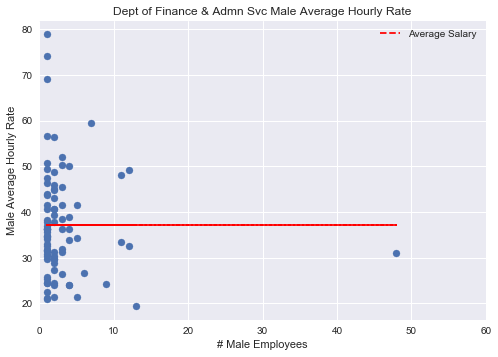

In [112]:
 y_mean = [np.mean(deptfinadmi_male_avg)]*len(deptfinadmin_data)

fig,ax = plt.subplots()

# Plot the data
plt.scatter(deptfinadmin_data['No. Male Empl'],deptfinadmin_data['Male Avg Hrly Rate'])
ax.set_xlim(0,60)

# Plot the average line
mean_line = ax.plot(deptfinadmin_data['No. Male Empl'],y_mean, label='Average Salary', linestyle='--', color='red')
print(f"The average salary of men that work in the Dept of Finance & Admn Svc is {y_mean}")
plt.xlabel('# Male Employees')
plt.ylabel('Male Average Hourly Rate')
plt.title('Dept of Finance & Admn Svc Male Average Hourly Rate')
legend = ax.legend(loc='upper right')
plt.savefig('Dept of Finance & Admn Svct Male Average Hourly Rate')
plt.show()

The average salary of woman that work in the Dept of Finance & Admn Svc is [36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.2

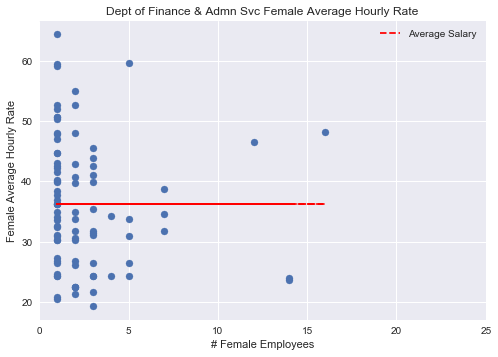

In [113]:
 y_mean = [np.mean(deptfinadmin_female_avg)]*len(deptfinadmin_data)

fig,ax = plt.subplots()

# Plot the data
plt.scatter(deptfinadmin_data['No. Female Empl'],deptfinadmin_data['Female Avg Hrly Rate'])
ax.set_xlim(0,25)

# Plot the average line
mean_line = ax.plot(deptfinadmin_data['No. Female Empl'],y_mean, label='Average Salary', linestyle='--', color='red')
print(f"The average salary of woman that work in the Dept of Finance & Admn Svc is {y_mean}")
plt.xlabel('# Female Employees')
plt.ylabel('Female Average Hourly Rate')
plt.title('Dept of Finance & Admn Svc Female Average Hourly Rate')
legend = ax.legend(loc='upper right')
plt.savefig('Dept of Finance & Admn Svc Female Average Hourly Rate')
plt.show()